In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%run utils/u.0.0-pandas_missing_extension.ipynb

In [3]:
arg_di_df = pd.read_csv('../data/interim/WDICSV_INTERIM.csv')

In [6]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

In [15]:
arg_di_df.shape

(64, 98)

In [16]:
arg_di_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 98 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   Year                                                                                                                                          64 non-null     int64  
 1   Access to electricity (% of population)                                                                                                       33 non-null     float64
 2   Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)                               4 non-null      float64
 3   Account ownership at a financial inst

In [9]:
arg_di_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,Year,0,64,0.0000
1,Access to electricity (% of population),31,64,48.4375
2,Account ownership at a financial institution o...,60,64,93.7500
3,Account ownership at a financial institution o...,60,64,93.7500
4,Account ownership at a financial institution o...,60,64,93.7500
...,...,...,...,...
93,Unemployment with advanced education (% of tot...,45,64,70.3125
94,Unemployment with basic education (% of total ...,45,64,70.3125
95,Unemployment with intermediate education (% of...,45,64,70.3125
96,"Unemployment, total (% of total labor force) (...",31,64,48.4375


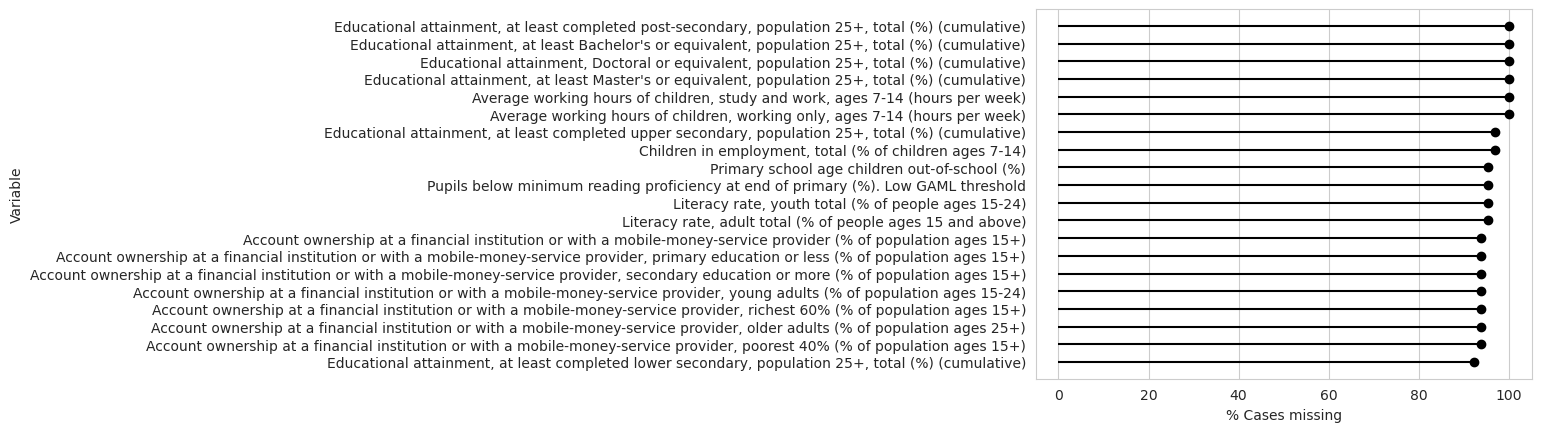

In [43]:
arg_di_df.missing.missing_variable_plot(20)

In [11]:
variable_summary = arg_di_df.missing.missing_variable_summary()

list(variable_summary[variable_summary['pct_missing'] > 50]['variable'])

['Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, young adults (% of population ages 15-24)',
 'Adequacy of social insurance programs (% of total welfare of beneficiary h

In [12]:
variable_summary = arg_di_df.missing.missing_case_summary()

list(variable_summary[variable_summary['pct_missing'] > 50]['case'])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 62,
 63]

In [4]:
arg_di_df_best_cases = arg_di_df.iloc[39:63].copy()

variable_summary = arg_di_df_best_cases.missing.missing_variable_summary()

arg_di_df_best_cases.drop(list(variable_summary[variable_summary['pct_missing'] > 50].loc[:,('variable')]), axis=1, inplace=True)

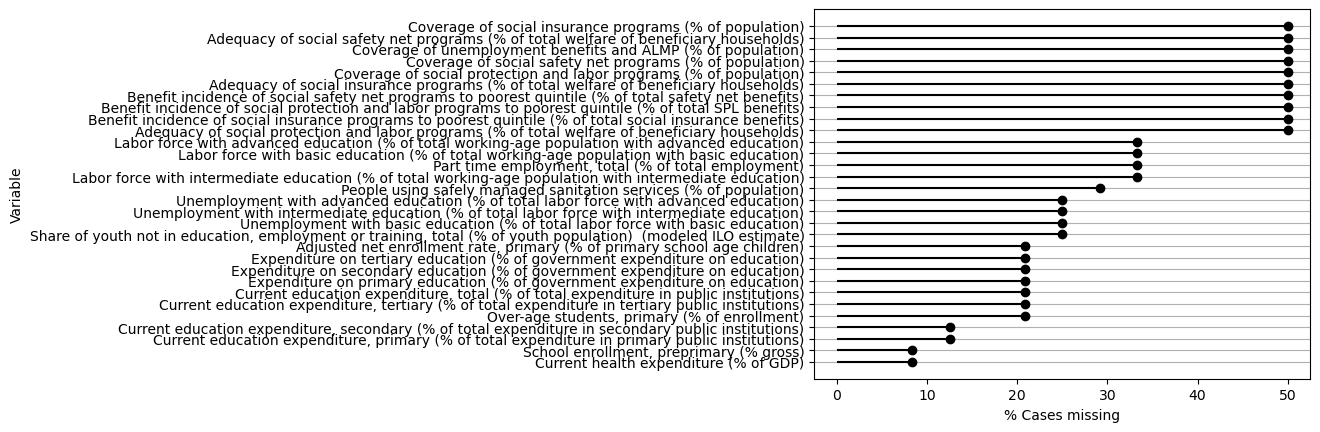

In [12]:
arg_di_df_best_cases.missing.missing_variable_plot(30)

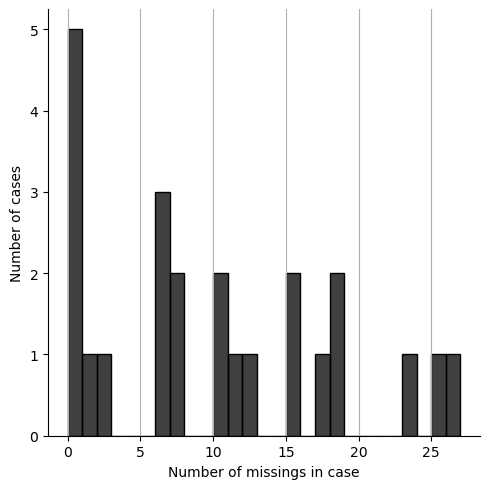

In [13]:
arg_di_df_best_cases.missing.missing_case_plot(30)

In [ ]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Coverage of social insurance programs (% of population)"
    )
)

,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [16]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Adequacy of social safety net programs (% of total welfare of beneficiary households)"
    )
)

,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [17]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Coverage of unemployment benefits and ALMP (% of population)"
    )
)


,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [19]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Labor force with advanced education (% of total working-age population with advanced education)"
    )
)


,run_length,is_na
0,5,missing
1,3,complete
2,1,missing
3,7,complete
4,2,missing
5,6,complete


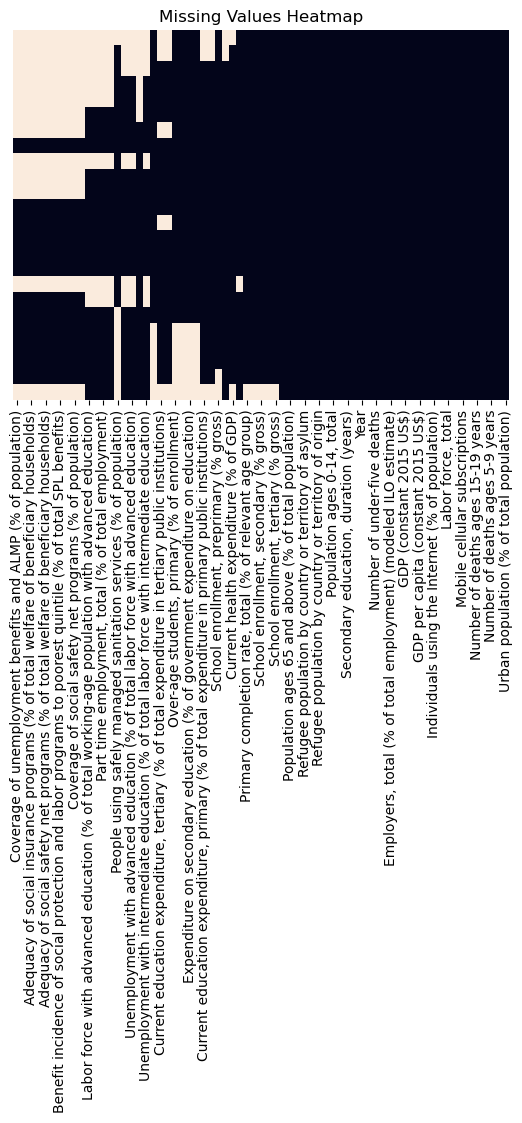

In [14]:
data = arg_di_df_best_cases.missing.sort_variables_by_missingness()
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

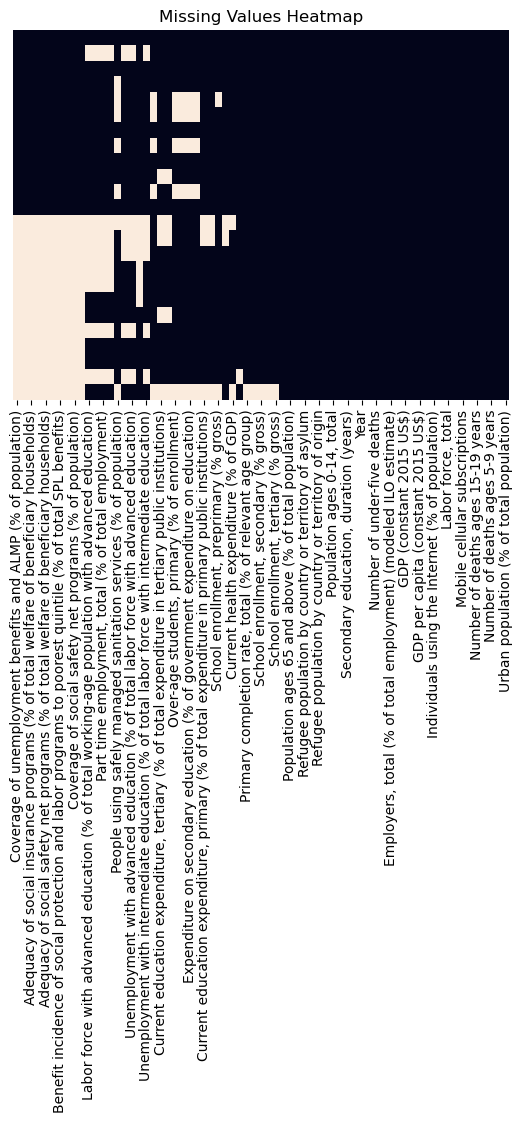

In [15]:
data = arg_di_df_best_cases.missing.sort_variables_by_missingness().sort_values(by="Coverage of unemployment benefits and ALMP (% of population)")
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
data = arg_di_df_best_cases.missing.sort_variables_by_missingness().sort_values(by="Coverage of unemployment benefits and ALMP (% of population)")
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
output_indicators_file = arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index_label='Year')